# 2019 Data Science Bowl EDA

参照元カーネル：https://www.kaggle.com/gpreda/2019-data-science-bowl-eda


## 特徴量の説明

### trian / test

- event_id : イベントタイプに対してランダムに生成された一意の識別子。 specsテーブルのevent_id列と結合てきる。
- game_session : 単一のゲームまたはビデオプレイセッション内でランダムに生成された一意の識別子イベント。
- timestamp : データ生成日時
- event_data : イベントパラメーターを含む半構造化JSON形式の文字列。デフォルトのフィールドは、event_count、event_code、game_timeです。それ以外の場合、フィールドはイベントタイプによって決定されます。
- installation_id : 単一のインストール済みアプリケーションインスタンス内でランダムに生成された一意の識別子ゲームセッション。
- event_count : ゲームセッション内のイベントの増分カウンター（1がオフセット）。 event_dataのjsonから抽出。
- event_code : イベント「クラス」の識別子。ゲームごとに一意ですが、ゲーム間で重複する場合があります。例えば。イベントコード「2000」は、すべてのゲームの「ゲーム開始」イベントを常に識別します。 event_dataのjsonから抽出。
- game_time : ゲームセッションの開始からのミリ秒単位の時間。 event_dataのjsonから抽出。
- title : ゲームまたはビデオのタイトル。
- type : ゲームまたはビデオのメディアタイプ。可能な値は、「ゲーム」、「評価」、「アクティビティ」、「クリップ」です。
- world : ゲームまたはビデオが属するアプリケーションのセクション。メディアの教育カリキュラムの目標を特定するのに役立ちます。指定可能な値は、「NONE」（アプリの開始画面）、TREETOPCITY」（長さ/高さ）、「MAGMAPEAK」（容量/変位）、「CRYSTALCAVES」（重量）です。


### specs
イベントタイプの仕様が記載されている。

- event_id : イベントタイプのグローバルな一意の識別子。 イベントテーブル(train / test)のevent_id列に結合します。
- info : イベントの説明。
- args : イベント引数のJSON形式の文字列。 各引数には次が含まれます。
    - name : 引数名。
    - type : 引数のタイプ（文字列、整数、数値、オブジェクト、配列）。
    - info : 引数の説明。

## <a id="21">Load the packages</a>  

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
sys.path.append(os.pardir)
sys.path.append('../..')
sys.path.append('../scripts')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 5000)
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import scripts.load_pickle_data as load_pickle
import scripts.load_data as load_data

## データのロード

In [2]:
train_df, test_df, specs_df, train_labels_df = load_pickle.read_pickle_data_all()

I1228 23:27:05.562872 4643007936 load_pickle_data.py:24] Reading train.pkl
I1228 23:27:11.825423 4643007936 load_pickle_data.py:29] Reading test.pkl
I1228 23:27:12.517443 4643007936 load_pickle_data.py:34] Reading specs.pkl
I1228 23:27:12.532925 4643007936 load_pickle_data.py:39] Reading train_labels.pkl


In [3]:
sample_submission_df = load_data.read_submission()

I1228 23:27:14.358242 4643007936 load_data.py:43] Reading sample_submission.csv


# <a id="3">Data exploration</a>  

## 下記データフレームを見ていく

- train_df;  
- test_df;  
- specs_df;
- train_labels_df;  

In [70]:
display(train_df.head(), train_df.shape)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


(11341042, 11)

In [69]:
display(test_df.head(), test_df.shape)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


(1156414, 11)

In [68]:
display(train_labels_df.head(), train_labels_df.shape)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.000,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.000,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.500,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000,3


(17690, 7)

# event_dataカラムとtrain_labels_dfの対応をチェック

In [71]:
train_labels_df.query('game_session == "77b8ee947eb84b4e"')

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000,0


In [103]:
train_df.query('game_session == "77b8ee947eb84b4e"').head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2681,f56e0afc,77b8ee947eb84b4e,2019-08-06T05:35:19.167Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2682,ec138c1c,77b8ee947eb84b4e,2019-08-06T05:35:19.174Z,"{""stage_number"":1,""event_count"":2,""game_time"":0,""event_code"":2020}",0006a69f,2,2020,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2683,1375ccb7,77b8ee947eb84b4e,2019-08-06T05:35:19.177Z,"{""description"":""Use the caterpillars to measure the birds. Pull the caterpillars out of their holes with your finger."",""identifier"":""Dot_UseCaterpillars,Dot_PullCaterpillarsFinger"",""media_type"":""audio"",""total_duration"":4410,""event_count"":3,""game_time"":0,""event_code"":3010}",0006a69f,3,3010,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2684,bdf49a58,77b8ee947eb84b4e,2019-08-06T05:35:23.654Z,"{""description"":""Use the caterpillars to measure the birds. Pull the caterpillars out of their holes with your finger."",""identifier"":""Dot_UseCaterpillars,Dot_PullCaterpillarsFinger"",""media_type"":""audio"",""duration"":4536,""event_count"":4,""game_time"":4536,""event_code"":3110}",0006a69f,4,3110,4536,Bird Measurer (Assessment),Assessment,TREETOPCITY
2685,51102b85,77b8ee947eb84b4e,2019-08-06T05:35:24.263Z,"{""hat"":0,""caterpillar"":""left"",""coordinates"":{""x"":68,""y"":570,""stage_width"":1015,""stage_height"":762},""hats"":[0,0,0],""caterpillars"":[2,2,2],""source"":""N/A"",""event_count"":5,""game_time"":5119,""event_code"":4030}",0006a69f,5,4030,5119,Bird Measurer (Assessment),Assessment,TREETOPCITY


In [9]:
specs_df.head()

,event_id,info,args
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""name"":""level"",""type"":""int"",""info"":""number of the current level when the event takes place or 0 if no level""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
1,df4fe8b6,"The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect round attempt (pressing the go button with the incorrect answer). It contains information that describes the content of the instruction. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
2,3babcb9b,"The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including duration. These events are used to determine the effectiveness of the instructions and the amount of time they consume. We can answer questions like, ""how much time elapsed while the game was presenting instruction?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
3,7f0836bf,"The end of system-initiated instruction event occurs when th

In [10]:
print(f"train installation id: {train_df.installation_id.nunique()}")
print(f"test installation id: {test_df.installation_id.nunique()}")
print(f"test & submission installation ids identical: {set(test_df.installation_id.unique()) == set(sample_submission_df.installation_id.unique())}")

train installation id: 17000
test installation id: 1000
test & submission installation ids identical: True


trainデータには17kの異なる`installation_id`があり、testには1kの異なる`installation_id`がある。  
また、sample_submissionの`installation_id`とtestの`installation_id`は一緒。

→この`installation_id`ごとに集計特徴量とか作ったら良さそう。あと、testに存在する`installation_id`だけtrainから抽出して学習させるとか。

## Missing values

- 欠損値はない

In [11]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [12]:
missing_data(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Types,object,object,object,object,object,int16,int16,int32,object,object,object


In [13]:
missing_data(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,0,0,0,0,0,0,0,0,0,0,0
Percent,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Types,object,object,object,object,object,int16,int16,int32,object,object,object


In [14]:
missing_data(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,0,0,0,0,0,0,0
Percent,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Types,object,object,object,int8,int8,float16,int8


In [15]:
missing_data(specs_df)

,event_id,info,args
Total,0,0,0
Percent,0.000,0.000,0.000
Types,object,object,object


## Unique values

In [16]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    tt['Percent'] = np.round(uniques / total * 100, 3)# (tt['Uniques']/tt['Total'] * 100)
    return(np.transpose(tt))

### Train

- 全体的に時間カラム以外にユニークな値が少ない

In [17]:
unique_values(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000,11341042.000
Uniques,384.000,303319.000,10777308.000,10893749.000,17000.000,3368.000,42.000,834048.000,44.000,4.000,4.000
Percent,0.003,2.675,95.029,96.056,0.150,0.030,0.000,7.354,0.000,0.000,0.000


### Test

In [18]:
unique_values(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000,1156414.000
Uniques,365.000,28445.000,1103166.000,1120854.000,1000.000,4456.000,42.000,309119.000,44.000,4.000,4.000
Percent,0.032,2.460,95.395,96.925,0.086,0.385,0.004,26.731,0.004,0.000,0.000


### Train labels

In [19]:
unique_values(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,17690.000,17690.000,17690.000,17690.000,17690.000,17690.000,17690.000
Uniques,17690.000,3614.000,5.000,2.000,46.000,30.000,4.000
Percent,100.000,20.430,0.028,0.011,0.260,0.170,0.023


### Specs

In [20]:
unique_values(specs_df)

,event_id,info,args
Total,386.000,386.000,386.000
Uniques,386.000,168.000,191.000
Percent,100.000,43.523,49.482


## Most frequent values

In [21]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

### Train

In [22]:
most_frequent_values(train_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042,11341042
Most frequent item,1325467d,6e6e697f2e593de1,2019-08-01T20:08:13.052Z,"{""event_code"": 2000, ""event_count"": 1}",f1c21eda,1,4070,0,Chow Time,Game,MAGMAPEAK
Frequence,274673,3368,11,183676,58988,303319,2349642,323152,1150974,5795293,5023687
Percent from total,2.422,0.030,0.000,1.620,0.520,2.675,20.718,2.849,10.149,51.100,44.297


### Test

In [23]:
most_frequent_values(test_df)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
Total,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414,1156414
Most frequent item,bb3e370b,b246933e8ac6a4aa,2019-09-13T18:38:38.848Z,"{""event_code"": 2000, ""event_count"": 1}",7b728c89,1,4070,0,Bottle Filler (Activity),Game,MAGMAPEAK
Frequence,28667,4456,9,15253,21237,28445,234260,30605,112223,572260,511291
Percent from total,2.479,0.385,0.001,1.319,1.836,2.460,20.257,2.647,9.704,49.486,44.213


### Train labels

In [24]:
most_frequent_values(train_labels_df)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
Total,17690,17690,17690,17690,17690,17690,17690
Most frequent item,a99cc327d9cab0de,08987c08,Cart Balancer (Assessment),1,0,1.000,3
Frequence,1,156,4151,13461,8845,8845,8845
Percent from total,0.006,0.882,23.465,76.094,50.000,50.000,50.000


### Specs

In [25]:
most_frequent_values(specs_df)

,event_id,info,args
Total,386,386,386
Most frequent item,828e68f9,This event occurs when the player clicks on the help button. It contains information about the state of the game that caused the player to seek help. This event is usually followed by a 3010 (system-initiated instruction) event. It helps identify points that players feel are too difficult.,"[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
Frequence,1,17,25
Percent from total,0.259,4.404,6.477


# installation_idのtrain / testの差分をチェック

- ない。よってtrainデータとtestデータはユーザーで分割されていることが分かる

In [45]:
len(train_df[train_df['installation_id'].isin(test_df['installation_id'])])

0

# event_codeの変化を確認

## train

- event_code = 2000, game_time=0で始まる

In [48]:
train_df.query('installation_id == "0001e90f"').head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [49]:
train_df.query('installation_id == "0001e90f"').tail()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1352,84538528,ca8b415f34d12873,2019-09-06T18:17:50.487Z,"{""size"":1,""castles_placed"":[{""size"":1,""position"":{""x"":525,""y"":161,""stage_width"":1015,""stage_height"":762}},{""size"":1,""position"":{""x"":720,""y"":161,""stage_width"":1015,""stage_height"":762}},{""size"":1,""position"":{""x"":376,""y"":161,""stage_width"":1015,""stage_height"":762}},{""size"":1,""position"":{""x"":454,""y"":204,""stage_width"":1015,""stage_height"":762}},{""size"":1,""position"":{""x"":611,""y"":225,""stage_width"":1015,""stage_height"":762}},{""size"":1,""position"":{""x"":338,""y"":263,""stage_width"":1015,""stage_height"":762}},{""size"":3,""position"":{""x"":563,""y"":391,""stage_width"":1015,""stage_height"":762}}],""duration"":1233,""coordinates"":{""x"":723,""y"":266,""stage_width"":1015,""stage_height"":762},""event_count"":107,""game_time"":85402,""event_code"":4020}",0001e90f,107,4020,85402,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1353,b2dba42b,ca8b415f34d12873,2019-09-06T18:17:50.489Z,"{""description"":""So cool!"",""identifier"":""Dot_SoCool"",""media_type"":""audio"",""total_duration"":1000,""event_count"":108,""game_time"":85402,""event_code"":3010}",0001e90f,108,3010,85402,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1354,1bb5fbdb,ca8b415f34d12873,2019-09-06T18:17:51.703Z,"{""description"":""So cool!"",""identifier"":""Dot_SoCool"",""media_type"":""audio"",""duration"":1217,""event_count"":109,""game_time"":86619,""event_code"":3110}",0001e90f,109,3110,86619,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1355,27253bdc,3fce4f09769ff0b7,2019-09-06T18:18:11.250Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY
1356,27253bdc,04168b61c0650977,2019-09-06T18:18:42.392Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Ordering Spheres,Clip,TREETOPCITY


## test

In [51]:
test_df.query('installation_id == "00abaee7"').head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [52]:
test_df.query('installation_id == "00abaee7"').tail()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
863,832735e1,ee2200d38a57537b,2019-09-12T13:51:37.371Z,"{""description"":""There we have it, folks. Some magnificent dives by the Claw Stars. They've won the gold!!"",""identifier"":""clip_329"",""media_type"":""animation"",""total_duration"":6583,""round"":4,""event_count"":132,""game_time"":178304,""event_code"":3010}",00abaee7,132,3010,178304,Dino Dive,Game,MAGMAPEAK
864,ab3136ba,ee2200d38a57537b,2019-09-12T13:51:44.003Z,"{""description"":""There we have it, folks. Some magnificent dives by the Claw Stars. They've won the gold!!"",""identifier"":""clip_329"",""media_type"":""animation"",""duration"":6634,""round"":4,""event_count"":133,""game_time"":184938,""event_code"":3110}",00abaee7,133,3110,184938,Dino Dive,Game,MAGMAPEAK
865,832735e1,ee2200d38a57537b,2019-09-12T13:51:47.877Z,"{""description"":""Okay, team, we have to win four dives."",""identifier"":""clip_312"",""media_type"":""animation"",""total_duration"":3200,""round"":4,""event_count"":134,""game_time"":188805,""event_code"":3010}",00abaee7,134,3010,188805,Dino Dive,Game,MAGMAPEAK
866,7961e599,ee2200d38a57537b,2019-09-12T13:51:47.878Z,"{""target_water_level"":3,""round"":5,""event_count"":135,""game_time"":188805,""event_code"":2020}",00abaee7,135,2020,188805,Dino Dive,Game,MAGMAPEAK
867,90d848e0,348d7f09f96af313,2019-09-12T13:52:12.193Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


In [56]:
train_df.query('type == "Game"').head(10)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
362,6d90d394,f11eb823348bfa23,2019-09-06T18:00:51.915Z,"{""version"":""1.0"",""level"":0,""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Scrub-A-Dub,Game,MAGMAPEAK
363,7040c096,f11eb823348bfa23,2019-09-06T18:00:56.121Z,"{""coordinates"":{""x"":1278,""y"":957,""stage_width"":2028,""stage_height"":1082},""level"":0,""round"":0,""event_count"":2,""game_time"":4205,""event_code"":4010}",0001e90f,2,4010,4205,Scrub-A-Dub,Game,MAGMAPEAK
364,5a848010,f11eb823348bfa23,2019-09-06T18:00:57.986Z,"{""movie_id"":""scrubadub_intro"",""duration"":13766,""description"":""So the farmer wants to take a picture of his animals. But look at them, they're totally filthy! Could you help the farmer wash them up 'til they're all sparkly and clean?"",""level"":0,""round"":0,""event_count"":3,""game_time"":6057,""event_code"":2080}",0001e90f,3,2080,6057,Scrub-A-Dub,Game,MAGMAPEAK
365,4a09ace1,f11eb823348bfa23,2019-09-06T18:01:11.792Z,"{""movie_id"":""scrubadub_intro"",""duration"":13766,""description"":""So the farmer wants to take a picture of his animals. But look at them, they're totally filthy! Could you help the farmer wash them up 'til they're all sparkly and clean?"",""level"":0,""round"":0,""event_count"":4,""game_time"":19873,""event_code"":2083}",0001e90f,4,2083,19873,Scrub-A-Dub,Game,MAGMAPEAK
366,dcaede90,f11eb823348bfa23,2019-09-06T18:01:13.792Z,"{""level"":1,""round"":0,""event_count"":5,""game_time"":21873,""event_code"":2040}",0001e90f,5,2040,21873,Scrub-A-Dub,Game,MAGMAPEAK
367,26fd2d99,f11eb823348bfa23,2019-09-06T18:01:13.792Z,"{""round_target"":{""size"":3,""type"":""Tub"",""animal"":""hog""},""options"":[0,3],""animals"":[""hog"",""chicken""],""level"":1,""round"":1,""event_count"":6,""game_time"":21873,""event_code"":2020}",0001e90f,6,2020,21873,Scrub-A-Dub,Game,MAGMAPEAK
368,f71c4741,f11eb823348bfa23,2019-09-06T18:01:13.793Z,"{""description"":""First you need to match the animals to the tubs that are just the right size!"",""identifier"":""tub_question"",""media_type"":""animation"",""total_duration"":4933,""level"":1,""round"":1,""event_count"":7,""game_time"":21873,""event_code"":3010}",0001e90f,7,3010,21873,Scrub-A-Dub,Game,MAGMAPEAK
369,cf82af56,f11eb823348bfa23,2019-09-06T18:01:15.138Z,"{""coordinates"":{""x"":670,""y"":565,""stage_width"":2028,""stage_height"":1082},""level"":1,""round"":1,""event_count"":8,""game_time"":23207,""event_code"":4070}",0001e90f,8,4070,23207,Scrub-A-Dub,Game,MAGMAPEAK
370,f7e47413,f11eb823348bfa23,2019-09-06T18:01:16.704Z,"{""description"":""First you need to match the animals to the tubs that are just the right size!"",""identifier"":""tub_question"",""media_type"":""animation"",""duration"":2900,""level"":1,""round"":1,""event_count"":9,""game_time"":24773,""event_code"":3110}",0001e90f,9,3110,24773,Scrub-A-Dub,Game,MAGMAPEAK
371,5c3d2b2f,f11eb823348bfa23,2019-09-06T18:01:16.710Z,"{""size"":3,""item_type"":""Tub"",""position"":2,""animal"":""hog"",""correct"":true,""coordinates"":{""x"":1392,""y"":311,""stage_width"":2028,""stage_height"":1082},""level"":1,""round"":1,""event_count"":10,""game_time"":24773,""event_code"":4020}",0001e90f,10,4020,24773,Scrub-A-Dub,Game,MAGMAPEAK


## <a id="34">Values distribution</a>  

In [113]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    plt.rcParams["font.size"]=12 # 図のfontサイズ
    plt.tick_params(labelsize=12) # 図のラベルのfontサイズ
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
        plt.tick_params(labelsize=12)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

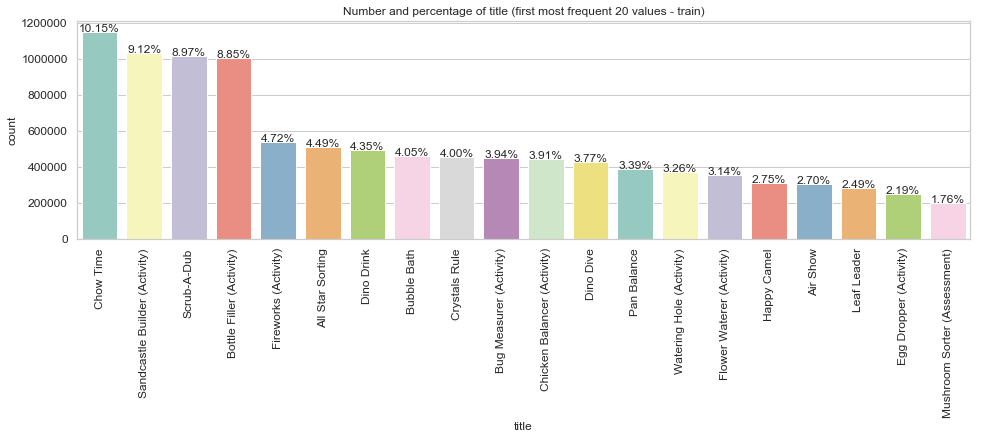

In [114]:
plot_count('title', 'title (first most frequent 20 values - train)', train_df, size=4)

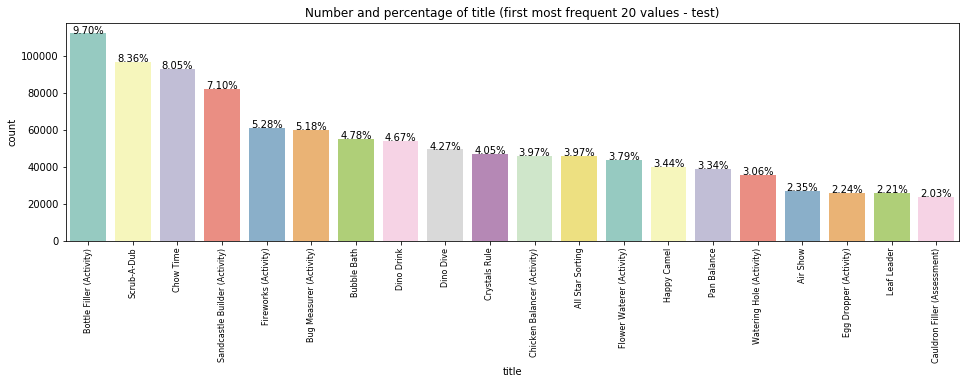

In [29]:
plot_count('title', 'title (first most frequent 20 values - test)', test_df, size=4)

In [30]:
print(f"Title values (train): {train_df.title.nunique()}")
print(f"Title values (test): {test_df.title.nunique()}")

Title values (train): 44
Title values (test): 44


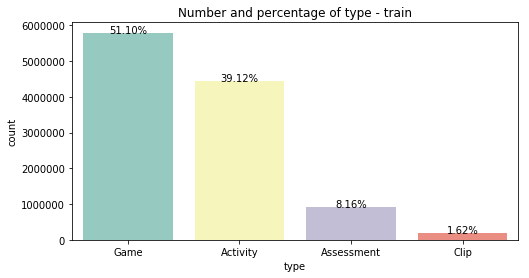

In [31]:
plot_count('type', 'type - train', train_df, size=2)

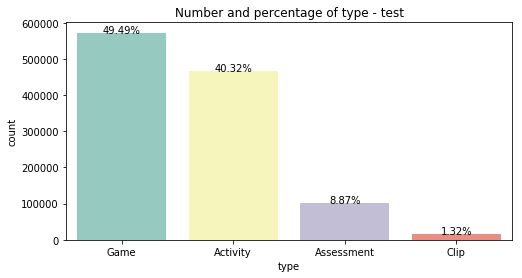

In [32]:
plot_count('type', 'type - test', test_df, size=2)

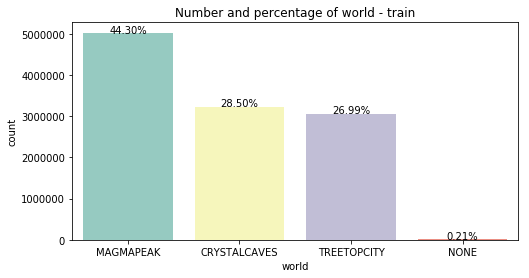

In [33]:
plot_count('world', 'world - train', train_df, size=2)

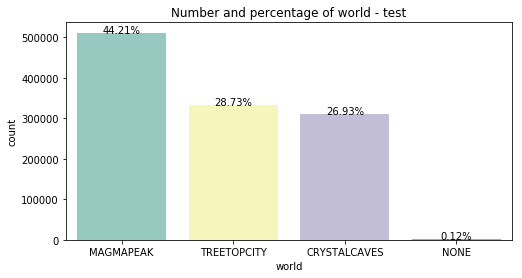

In [34]:
plot_count('world', 'world - test', test_df, size=2)

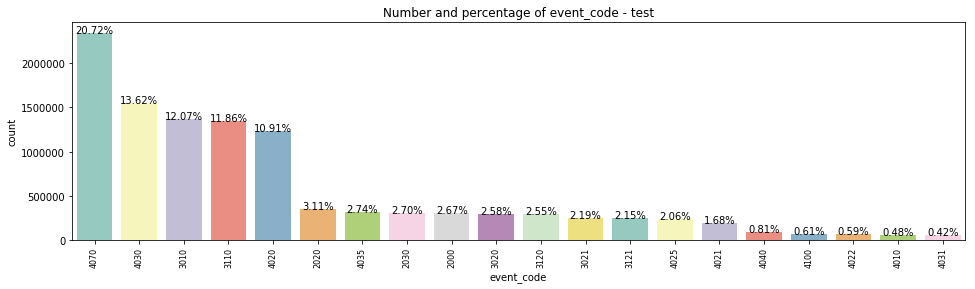

In [35]:
plot_count('event_code', 'event_code - test', train_df, size=4)

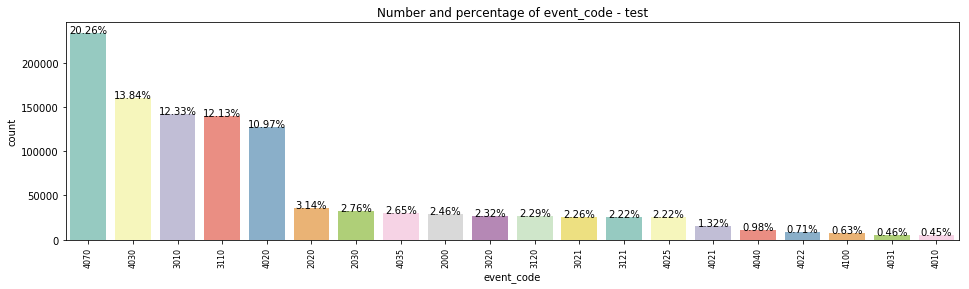

In [36]:
plot_count('event_code', 'event_code - test', test_df, size=4)

### Train_labels

In [37]:
for column in train_labels_df.columns.values:
    print(f"[train_labels] Unique values of {column} : {train_labels_df[column].nunique()}")

[train_labels] Unique values of game_session : 17690
[train_labels] Unique values of installation_id : 3614
[train_labels] Unique values of title : 5
[train_labels] Unique values of num_correct : 2
[train_labels] Unique values of num_incorrect : 46
[train_labels] Unique values of accuracy : 30
[train_labels] Unique values of accuracy_group : 4


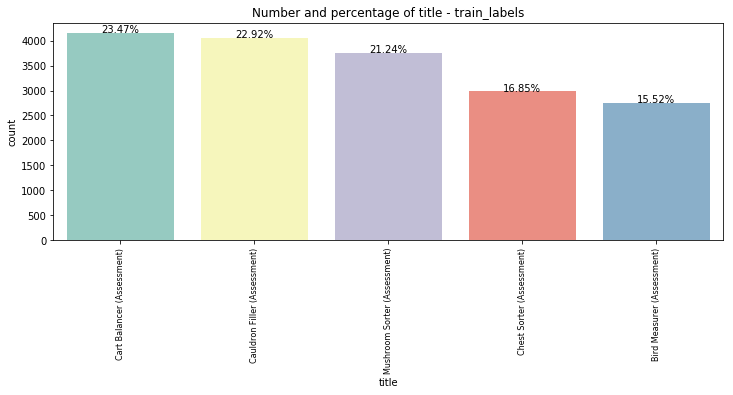

In [38]:
plot_count('title', 'title - train_labels', train_labels_df, size=3)

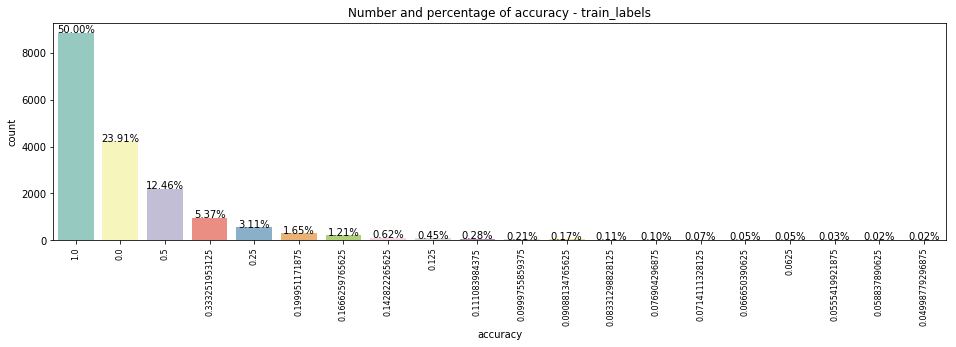

In [43]:
plot_count('accuracy', 'accuracy - train_labels', train_labels_df, size=4)

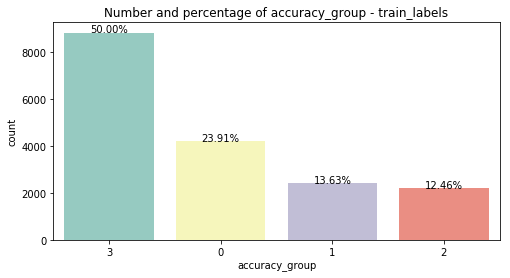

In [44]:
plot_count('accuracy_group', 'accuracy_group - train_labels', train_labels_df, size=2)

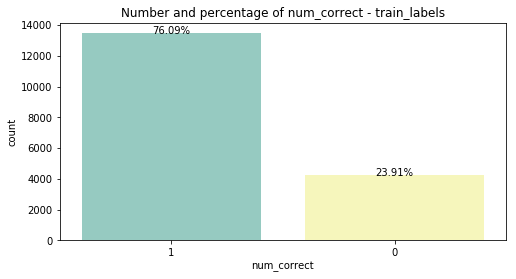

In [45]:
plot_count('num_correct', 'num_correct - train_labels', train_labels_df, size=2)

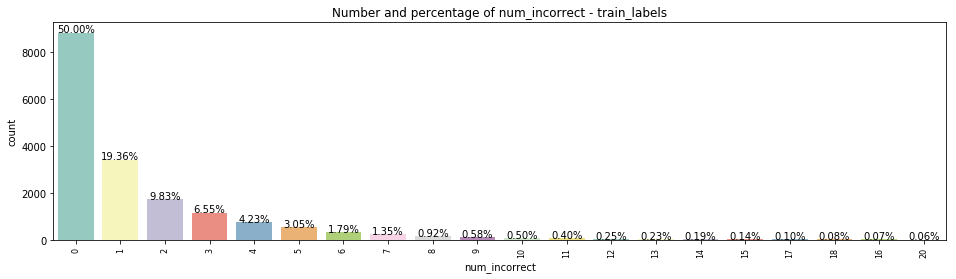

In [46]:
plot_count('num_incorrect', 'num_incorrect - train_labels', train_labels_df, size=4)

In [43]:
train_labels_df.query('accuracy_group==1').describe()

,num_correct,num_incorrect,accuracy,accuracy_group
count,2411.000,2411.000,2411.000,2411.000
mean,1.000,3.955,0.246,1.000
std,0.000,3.125,0.084,0.000
min,1.000,2.000,0.024,1.000
25%,1.000,2.000,0.167,1.000
50%,1.000,3.000,0.250,1.000
75%,1.000,5.000,0.333,1.000
max,1.000,40.000,0.333,1.000


### Specs

In [47]:
for column in specs_df.columns.values:
    print(f"[specs] Unique values of `{column}`: {specs_df[column].nunique()}")

[specs] Unique values of `event_id`: 386
[specs] Unique values of `info`: 168
[specs] Unique values of `args`: 191


# Assesmentイベントについて

In [58]:
len(train_df.query('type == "Assessment"'))

925345

In [60]:
len(train_df.query('event_code == 4110'))

13608

In [62]:
train_df.query('type == "Assessment"')['game_session'].nunique()

21239

## Extract features from train/event_data

#### 100kのデータをランダムサンプリングして、特徴量を生成してみる

In [73]:
sample_train_df = train_df.sample(100000)

In [90]:
display(sample_train_df.head(10), sample_train_df.shape)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3130010,3323d7e9,cc959799fdf8660b,2019-08-28T00:45:14.289Z,"{""duration"":30129,""misses"":1,""round"":7,""event_count"":138,""game_time"":151313,""event_code"":2030}",4563c9f4,138,2030,151313,Crystals Rule,Game,TREETOPCITY
7957249,08fd73f3,f779a61fc23bbd8c,2019-08-18T21:21:10.532Z,"{""duration"":5670,""round_target"":{""size"":2,""type"":""Soap"",""animal"":""pig""},""misses"":1,""level"":12,""round"":39,""event_count"":415,""game_time"":302020,""event_code"":2030}",b23a1d05,415,2030,302020,Scrub-A-Dub,Game,MAGMAPEAK
10601052,587b5989,3c74590eb3a4a878,2019-08-18T13:44:23.631Z,"{""coordinates"":{""x"":709,""y"":564,""stage_width"":1015,""stage_height"":762},""round"":1,""event_count"":14,""game_time"":16849,""event_code"":4070}",f002d4bb,14,4070,16849,All Star Sorting,Game,TREETOPCITY
1039165,cfbd47c8,839671b547cc7f09,2019-09-08T23:41:44.688Z,"{""weight"":1,""source"":""resources"",""resources"":[3,1,3],""coordinates"":{""x"":474,""y"":695,""stage_width"":1015,""stage_height"":762},""round"":1,""event_count"":8,""game_time"":43215,""event_code"":4030}",1844b642,8,4030,43215,Chow Time,Game,CRYSTALCAVES
1844707,a52b92d5,a9b0e246e7c1031e,2019-10-14T17:25:37.450Z,"{""description"":""To pick a mushroom, pull it out of the ground with your finger!"",""identifier"":""Dot_PickFinger"",""media_type"":""audio"",""duration"":2717,""event_count"":6,""game_time"":6669,""event_code"":3110}",2a704e84,6,3110,6669,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
4759917,bb3e370b,3b76abbafeaec414,2019-08-17T13:12:43.822Z,"{""bottle"":{""amount"":2,""color"":""yellow""},""bottles"":[{""color"":""blue"",""amount"":2},{""color"":""blue"",""amount"":1},{""color"":""purple"",""amount"":2},{""color"":""purple"",""amount"":1},{""color"":""orange"",""amount"":1},{""color"":""orange"",""amount"":2},{""color"":""pink"",""amount"":1},{""color"":""pink"",""amount"":2},{""color"":""yellow"",""amount"":1},{""color"":""yellow"",""amount"":2},{""color"":""green"",""amount"":1},{""color"":""green"",""amount"":2}],""coordinates"":{""x"":847,""y"":517,""stage_width"":1015,""stage_height"":762},""source"":10,""round"":7,""event_count"":79,""game_time"":127500,""event_code"":4030}",6a342a61,79,4030,127500,Bottle Filler (Activity),Activity,MAGMAPEAK
5806841,67439901,95279ded6c278240,2019-07-24T22:01:09.924Z,"{""description"":""Oh, wow!"",""identifier"":""ohWow"",""media_type"":""animation"",""total_duration"":2066,""round"":27,""event_count"":275,""game_time"":871501,""event_code"":3010}",8063c8c3,275,3010,871501,Bottle Filler (Activity),Activity,MAGMAPEAK
3840148,9ee1c98c,e7ea79dc52bca58f,2019-07-26T04:48:13.819Z,"{""size"":3,""sand"":1,""duration"":616,""coordinates"":{""x"":568,""y"":587,""stage_width"":1015,""stage_height"":762},""filled"":false,""event_count"":59,""game_time"":71411,""event_code"":4021}",544ac899,59,4021,71411,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1247565,4c2ec19f,bc30fa3fc4961a8c,2019-09-28T20:39:01.348Z,"{""nest"":4,""layout"":{""row1"":[""empty"",""right"",""empty""],""row2"":[""right"",""empty"",""right""]},""coordinates"":{""x"":476,""y"":206,""stage_width"":1015,""stage_height"":762},""event_count"":28,""game_time"":45640,""event_code"":4025}",1c3d7cdb,28,4025,45640,Egg Dropper (Activity),Activity,CRYSTALCAVES
9878819,7372e1a5,c1f05a881e0856d5,2019-09-20T19:51:24.095Z,"{""coordinates"":{""x"":588,""y"":644,""stage_width"":1015,""stage_height"":762},""round"":4,""event_count"":153,""game_time"":122788,""event_code"":4070}",dcac00f9,153,4070,122788,Chow Time,Game,CRYSTALCAVES


(100000, 11)

`event_data` についていくつか見ていく

In [76]:
sample_train_df.iloc[0].event_data

'{"duration":30129,"misses":1,"round":7,"event_count":138,"game_time":151313,"event_code":2030}'

In [77]:
sample_train_df.iloc[1].event_data

'{"duration":5670,"round_target":{"size":2,"type":"Soap","animal":"pig"},"misses":1,"level":12,"round":39,"event_count":415,"game_time":302020,"event_code":2030}'

jsonパッケージを使用してjsonを正規化する。キーごとに1つの列を作成し、列の値はjsonのキーに関連付けられた値になる。  
生成された列は疎行列に近い形になっている。

In [81]:
%%time
extracted_event_data = pd.io.json.json_normalize(sample_train_df.event_data.apply(json.loads))

CPU times: user 6.48 s, sys: 172 ms, total: 6.65 s
Wall time: 6.68 s


In [82]:
print(f"Extracted data shape: {extracted_event_data.shape}")

Extracted data shape: (100000, 136)


In [83]:
extracted_event_data.head(10)

,animal,animals,bird_height,bottle.amount,bottle.color,bottles,bowl_id,bowls,bucket,buckets,buckets_placed,bug,bug_length,buglength,castles_placed,caterpillar,caterpillars,cauldron,chests,cloud,cloud_size,container_type,containers,coordinates.stage_height,coordinates.stage_width,coordinates.x,coordinates.y,correct,crystal_id,crystals,current_containers,description,destination,diet,dinosaur,dinosaur_count,dinosaur_weight,dinosaurs,dinosaurs_placed,distance,duration,dwell_time,end_position,event_code,event_count,exit_type,filled,flower,flowers,game_time,gate.column,gate.row,gate.side,group,growth,has_toy,has_water,hat,hats,hats_placed,height,holding_shell,hole_position,holes,house.position,house.size,houses,identifier,item_type,jar,jar_filled,launched,layout.left.chickens,layout.left.pig,layout.right.chickens,layout.right.pig,layout.row1,layout.row2,left,level,location,max_position,media_type,misses,mode,molds,movie_id,nest,object,object_type,options,pillars,position,previous_jars,prompt,resources,right,rocket,round,round_number,round_prompt,round_target.animal,round_target.size,round_target.type,sand,scale_contents,scale_weight,scale_weights,session_duration,shell_size,shells,side,size,source,stage_number,starting_weights,stumps,table_weights,tape_length,target_bucket,target_containers,target_distances,target_size,target_water_level,target_weight,time_played,total_bowls,total_containers,total_duration,toy,toy_earned,tutorial_step,version,water_level,weight,weights
0,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,30129.000,nan,nan,2030,138,NaN,NaN,nan,NaN,151313.000,nan,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,1.000,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,7.000,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,nan
1,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,5670.000,nan,nan,2030,415,NaN,NaN,nan,NaN,302020.000,nan,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,12.000,NaN,nan,NaN,1.000,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,39.000,nan,NaN,pig,2.000,Soap,nan,NaN,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,nan
2,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,762.000,1015.000,709.000,564.000,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,4070,14,NaN,NaN,nan,NaN,16849.000,nan,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,1.000,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,nan,nan
3,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,762.000,1015.000,474.000,695.000,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,nan,nan,nan,4030,8,NaN,NaN,nan,NaN,43215.000,nan,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,"[3, 1, 3]",NaN,nan,1.000,nan,NaN,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,NaN,nan,resources,nan,nan,NaN,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,nan,1.000,nan
4,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,"To pick a mushroom, pull it out of the ground with your finger!",NaN,NaN,NaN,nan,nan,NaN,NaN,n

In [84]:
missing_data(extracted_event_data)

,animal,animals,bird_height,bottle.amount,bottle.color,bottles,bowl_id,bowls,bucket,buckets,buckets_placed,bug,bug_length,buglength,castles_placed,caterpillar,caterpillars,cauldron,chests,cloud,cloud_size,container_type,containers,coordinates.stage_height,coordinates.stage_width,coordinates.x,coordinates.y,correct,crystal_id,crystals,current_containers,description,destination,diet,dinosaur,dinosaur_count,dinosaur_weight,dinosaurs,dinosaurs_placed,distance,duration,dwell_time,end_position,event_code,event_count,exit_type,filled,flower,flowers,game_time,gate.column,gate.row,gate.side,group,growth,has_toy,has_water,hat,hats,hats_placed,height,holding_shell,hole_position,holes,house.position,house.size,houses,identifier,item_type,jar,jar_filled,launched,layout.left.chickens,layout.left.pig,layout.right.chickens,layout.right.pig,layout.row1,layout.row2,left,level,location,max_position,media_type,misses,mode,molds,movie_id,nest,object,object_type,options,pillars,position,previous_jars,prompt,resources,right,rocket,round,round_number,round_prompt,round_target.animal,round_target.size,round_target.type,sand,scale_contents,scale_weight,scale_weights,session_duration,shell_size,shells,side,size,source,stage_number,starting_weights,stumps,table_weights,tape_length,target_bucket,target_containers,target_distances,target_size,target_water_level,target_weight,time_played,total_bowls,total_containers,total_duration,toy,toy_earned,tutorial_step,version,water_level,weight,weights
Total,98873,99148,99748,95589,95589,95585,98783,99890,99482,99449,99442,99335,99999,99785,99562,99396,99308,99839,99998,98573,98573,99920,99937,48690,48690,48690,48690,92776,99175,99139,99748,66073,99193,99666,96537,99348,99350,97845,99139,99636,66670,99993,99983,0,0,99977,98730,98800,98406,1661,99638,99638,99638,99770,99615,98953,98575,99543,99538,99921,98352,98575,99642,99528,99214,99214,99740,66643,98873,97823,98409,99107,97305,97305,97305,97305,99226,99226,98746,91013,99420,99983,66643,97646,99231,99984,99430,99620,97966,99600,99148,99138,96392,99260,99821,97017,98746,98191,40095,99884,99939,98374,98374,98374,99074,97584,98809,98941,99895,98665,99886,98844,93144,86354,99945,99850,99554,98393,99999,99881,99703,99597,99830,99888,98673,99921,99890,99748,83218,99491,99945,99937,98911,98792,94120,99602
Percent,98.873,99.148,99.748,95.589,95.589,95.585,98.783,99.890,99.482,99.449,99.442,99.335,99.999,99.785,99.562,99.396,99.308,99.839,99.998,98.573,98.573,99.920,99.937,48.690,48.690,48.690,48.690,92.776,99.175,99.139,99.748,66.073,99.193,99.666,96.537,99.348,99.350,97.845,99.139,99.636,66.670,99.993,99.983,0.000,0.000,99.977,98.730,98.800,98.406,1.661,99.638,99.638,99.638,99.770,99.615,98.953,98.575,99.543,99.538,99.921,98.352,98.575,99.642,99.528,99.214,99.214,99.740,66.643,98.873,97.823,98.409,99.107,97.305,97.305,97.305,97.305,99.226,99.226,98.746,91.013,99.420,99.983,66.643,97.646,99.231,99.984,99.430,99.620,97.966,99.600,99.148,99.138,96.392,99.260,99.821,97.017,98.746,98.191,40.095,99.884,99.939,98.374,98.374,98.374,99.074,97.584,98.809,98.941,99.895,98.665,99.886,98.844,93.144,86.354,99.945,99.850,99.554,98.393,99.999,99.881,99.703,99.597,99.830,99.888,98.673,99.921,99.890,99.748,83.218,99.491,99.945,99.937,98.911,98.792,94.120,99.602
Types,object,object,float64,float64,object,object,float64,object,float64,object,object,object,float64,float64,object,object,object,float64,object,object,float64,object,float64,float64,float64,float64,float64,object,object,object,float64,object,object,object,object,float64,float64,object,object,float64,float64,float64,float64,int64,int64,object,object,float64,object,float64,float64,float64,object,float64,object,object,object,float64,object,object,float64,object,float64,object,float64,float64,object,object,object,object,object,object,float64,object,float64,object,object,object,object,float64,object,float64,object,float64,object,object,object,float64,object,object,object,object,float64,object,object,object,object,float64,float64,float6

`existing_data`関数を用いて、存在データが多いカラム順のデータを取得する

In [85]:
def existing_data(data):
    total = data.isnull().count() - data.isnull().sum()
    percent = 100 - (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    tt = pd.DataFrame(tt.reset_index())
    return(tt.sort_values(['Total'], ascending=False))

In [86]:
stat_event_data = existing_data(extracted_event_data)

In [92]:
stat_event_data.head(15)

,index,Total,Percent
43,event_code,100000,100.000
44,event_count,100000,100.000
49,game_time,98339,98.339
98,round,59905,59.905
23,coordinates.stage_height,51310,51.310
25,coordinates.x,51310,51.310
26,coordinates.y,51310,51.310
24,coordinates.stage_width,51310,51.310
31,description,33927,33.927
82,media_type,33357,33.357


最初の40個のデータを見てみる

Text(0, 0.5, 'Features')

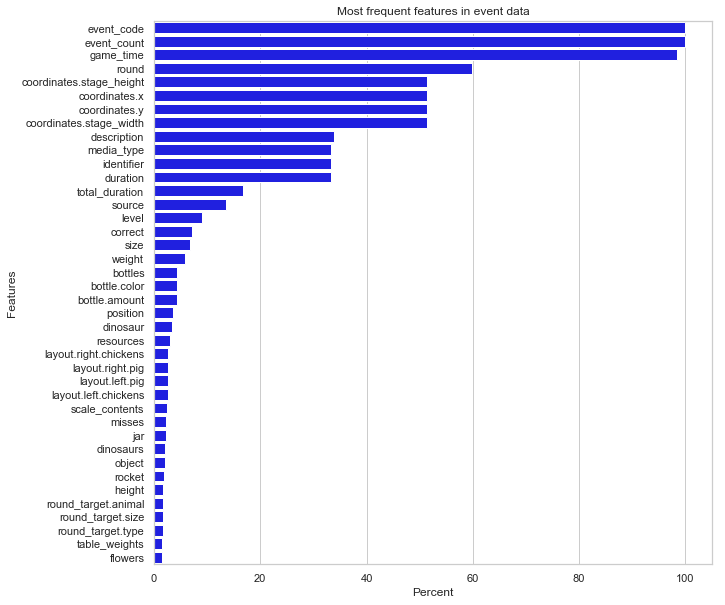

In [89]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
ax = sns.barplot(x='Percent', y='index', data=stat_event_data.head(40), color='blue')
plt.title('Most frequent features in event data')
plt.ylabel('Features')

## specsのargsについて見てみる  

In [93]:
specs_df.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

Each row contains a list of key-values pairs (a dictionary), with the keys: `name`, `type` & `info`.
We will parse this structure and generate new rows for each spec.

In [94]:
specs_args_extracted = pd.DataFrame()
for i in range(0, specs_df.shape[0]): 
    for arg_item in json.loads(specs_df.args[i]) :
        new_df = pd.DataFrame({'event_id': specs_df['event_id'][i],\
                               'info':specs_df['info'][i],\
                               'args_name': arg_item['name'],\
                               'args_type': arg_item['type'],\
                               'args_info': arg_item['info']}, index=[i])
        specs_args_extracted = specs_args_extracted.append(new_df)

In [95]:
print(f"Extracted args from specs: {specs_args_extracted.shape}")

Extracted args from specs: (2541, 5)


There is a variable number of arguments for each `event_id`.

In [96]:
specs_args_extracted.head(5)

,event_id,info,args_name,args_type,args_info
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""",game_time,int,millisecond count since start of game
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""",round,int,number of the current round when the event takes place or 0 if no round
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""",level,int,number of the current level when the event takes place or 0 if no level
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""",description,string,the text or description of the instruction
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""",identifier,string,a unique identifier for this piece of instruction


`event_id`の引数の分布を見てみると、大体4〜8の引数を持っていることが分かる

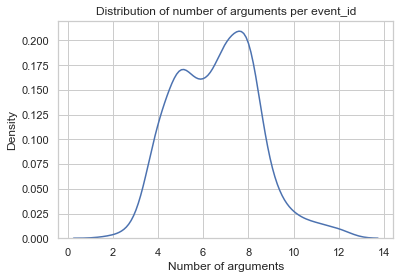

In [97]:
tmp = specs_args_extracted.groupby(['event_id'])['info'].count()
df = pd.DataFrame({'event_id':tmp.index, 'count': tmp.values})
plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
ax = sns.distplot(df['count'],kde=True,hist=False, bins=40)
plt.title('Distribution of number of arguments per event_id')
plt.xlabel('Number of arguments'); plt.ylabel('Density'); plt.show()

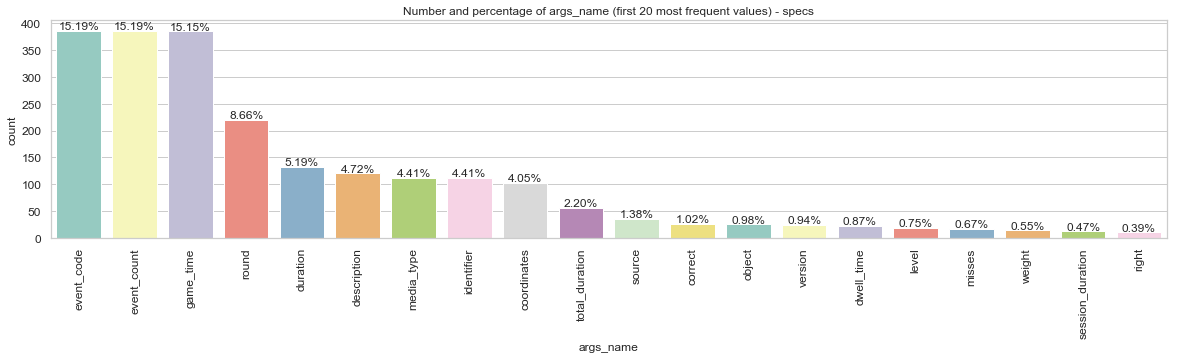

In [115]:
plot_count('args_name', 'args_name (first 20 most frequent values) - specs', specs_args_extracted, size=5)

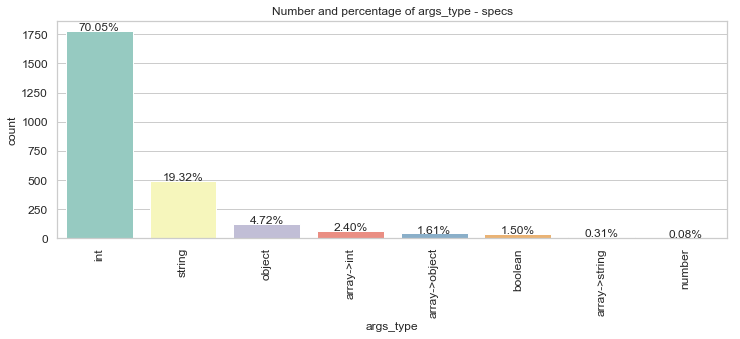

In [116]:
plot_count('args_type', 'args_type - specs', specs_args_extracted, size=3)

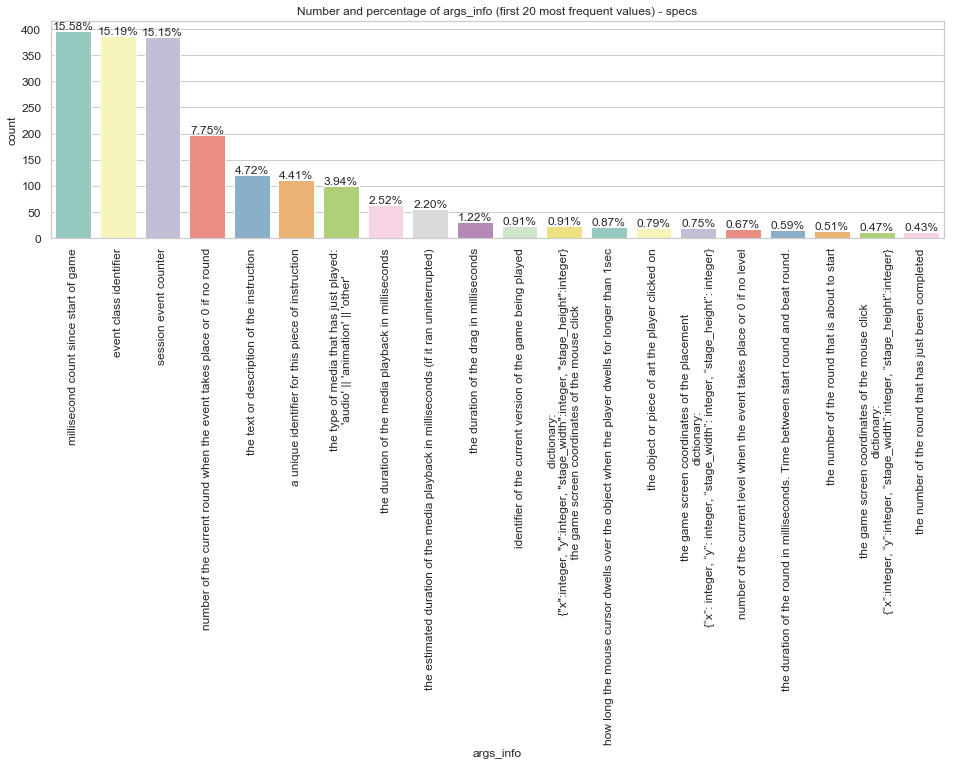

In [117]:
plot_count('args_info', 'args_info (first 20 most frequent values) - specs', specs_args_extracted, size=4)

## Merged data distribution

trainとtrain_labelsをマージしてみる

### Extract time features

We define a function to extract time features. We will apply this function for both train and test datasets.

In [118]:
def extract_time_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['year'] = df['timestamp'].dt.year
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_month_start'] = df['timestamp'].dt.is_month_start
    return df

We apply the function to extract time features.

In [119]:
train_df = extract_time_features(train_df)

In [120]:
test_df = extract_time_features(test_df)

In [121]:
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,45bb1e1b6b50c07b,2019-09-06 17:53:46.937000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-06,9,17,2019,4,36,249,3,False
1,27253bdc,17eeb7f223665f53,2019-09-06 17:54:17.519000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
2,77261ab5,0848ef14a8dc6892,2019-09-06 17:54:56.302000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
3,b2dba42b,0848ef14a8dc6892,2019-09-06 17:54:56.387000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06 17:55:03.253000+00:00,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,2019-09-06,9,17,2019,4,36,249,3,False


In [122]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,date,month,hour,year,dayofweek,weekofyear,dayofyear,quarter,is_month_start
0,27253bdc,0ea9ecc81a565215,2019-09-10 16:50:24.910000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,2019-09-10,9,16,2019,1,37,253,3,False
1,27253bdc,c1ea43d8b8261d27,2019-09-10 16:50:55.503000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,2019-09-10,9,16,2019,1,37,253,3,False
2,27253bdc,7ed86c6b72e725e2,2019-09-10 16:51:51.805000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK,2019-09-10,9,16,2019,1,37,253,3,False
3,27253bdc,7e516ace50e7fe67,2019-09-10 16:53:12.825000+00:00,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES,2019-09-10,9,16,2019,1,37,253,3,False
4,7d093bf9,a022c3f60ba547e7,2019-09-10 16:54:12.115000+00:00,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES,2019-09-10,9,16,2019,1,37,253,3,False


We inspect now the date/time type data.

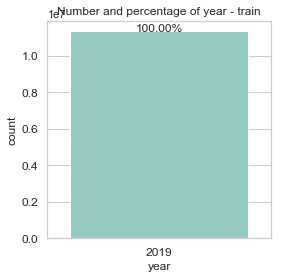

In [123]:
plot_count('year', 'year - train', train_df, size=1)

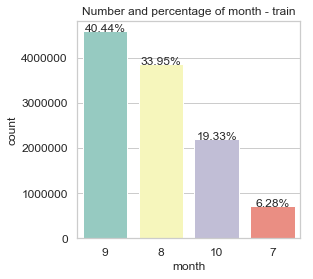

In [124]:
plot_count('month', 'month - train', train_df, size=1)

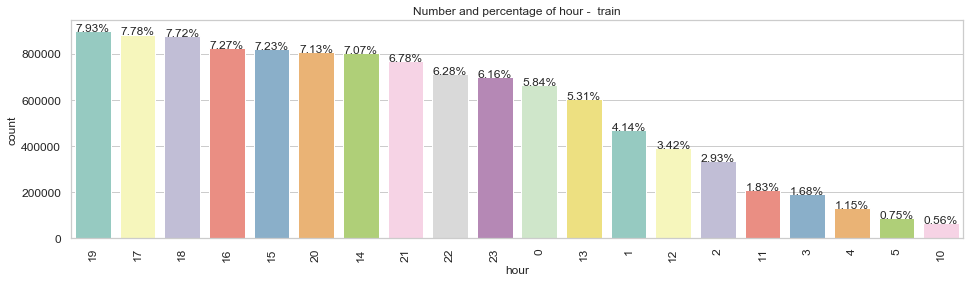

In [125]:
plot_count('hour', 'hour -  train', train_df, size=4)

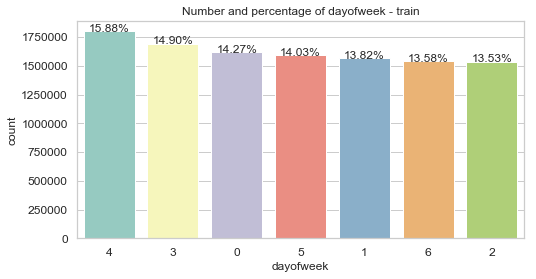

In [126]:
plot_count('dayofweek', 'dayofweek - train', train_df, size=2)

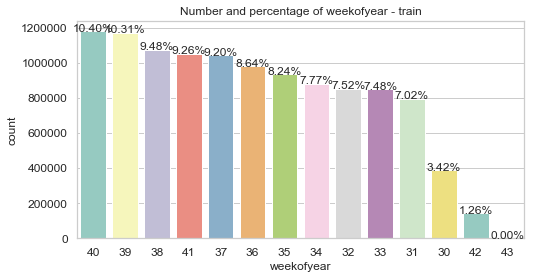

In [127]:
plot_count('weekofyear', 'weekofyear - train', train_df, size=2)

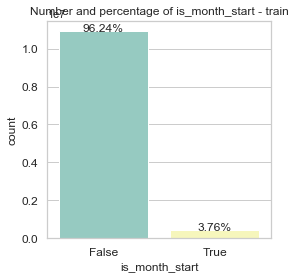

In [128]:
plot_count('is_month_start', 'is_month_start - train', train_df, size=1)

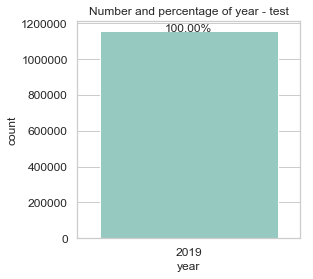

In [129]:
plot_count('year', 'year - test', test_df, size=1)

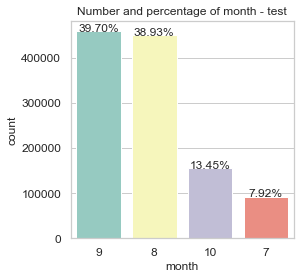

In [130]:
plot_count('month', 'month - test', test_df, size=1)

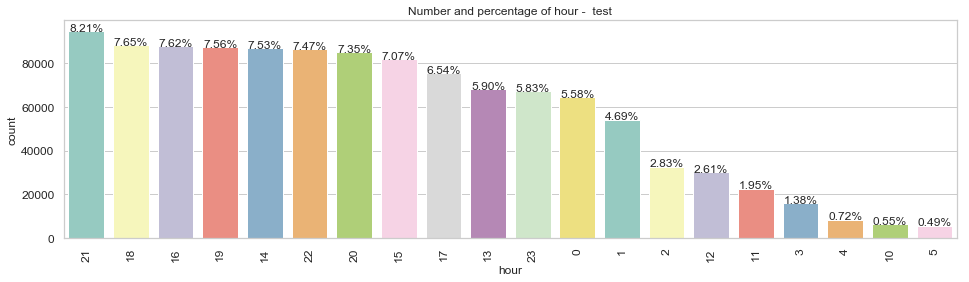

In [131]:
plot_count('hour', 'hour -  test', test_df, size=4)

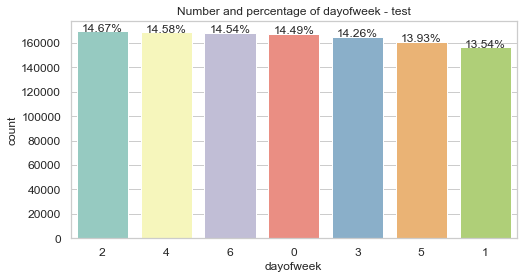

In [132]:
plot_count('dayofweek', 'dayofweek - test', test_df, size=2)

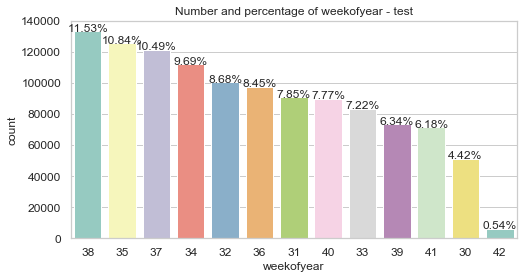

In [133]:
plot_count('weekofyear', 'weekofyear - test', test_df, size=2)

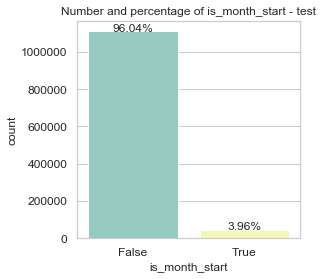

In [134]:
plot_count('is_month_start', 'is_month_start - test', test_df, size=1)

### 数値列とカテゴリ列を定義し、これらを使用して集約値を計算する。

In [137]:
numerical_columns = ['game_time', 'month', 'dayofweek', 'hour']
categorical_columns = ['type', 'world']

comp_train_df = pd.DataFrame({'installation_id': train_df['installation_id'].unique()})
comp_train_df.set_index('installation_id', inplace = True)

In [138]:
comp_train_df.head()

""
installation_id
0001e90f
000447c4
0006a69f
0006c192
0009a5a9


In [139]:
def get_numeric_columns(df, column):
    df = df.groupby('installation_id').agg({f'{column}': ['mean', 'sum', 'min', 'max', 'std', 'skew']})
    df[column].fillna(df[column].mean(), inplace = True)
    df.columns = [f'{column}_mean', f'{column}_sum', f'{column}_min', f'{column}_max', f'{column}_std', f'{column}_skew']
    return df

Then, we calculate the compacted form of train, by merging the aggregated numerical features from train with the dataset with unique `installation_id`.

In [140]:
for i in numerical_columns:
    comp_train_df = comp_train_df.merge(get_numeric_columns(train_df, i), left_index = True, right_index = True)

/Users/takapy/.pyenv/versions/3.7.2/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [141]:
comp_train_df.head()

,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,month_sum,month_min,month_max,month_std,month_skew,dayofweek_mean,dayofweek_sum,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
installation_id,,,,,,,,,,,,,,,,,,,,,,,,
0001e90f,201787.800,273826044.000,0,570396,164377.068,0.664,9.000,12213,9,9,0.000,0.000,4.000,5428,4,4,0.000,0.000,17.733,24064,17,18,0.442,-1.056
000447c4,81011.751,14663127.000,0,175347,47014.119,0.102,10.000,1810,10,10,0.000,0.000,4.000,724,4,4,0.000,0.000,14.691,2659,14,15,0.464,-0.832
0006a69f,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052
0006c192,90398.353,201045937.000,0,395901,77779.338,1.366,9.238,20546,9,10,0.426,1.229,3.893,8659,1,5,1.656,-1.091,9.883,21979,0,15,6.944,-0.674
0009a5a9,398593.544,164220540.000,0,1684228,648848.534,1.313,9.000,3708,9,9,0.000,0.000,2.000,824,2,2,0.000,0.000,18.226,7509,18,19,0.419,1.317


In [142]:
print(f"comp_train shape: {comp_train_df.shape}")

comp_train shape: (17000, 24)


In [153]:
# titleごとのaccuracy_groupの最頻値を計算
labels_map = dict(train_labels_df.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0]))

In [154]:
display(labels_map)

{'Bird Measurer (Assessment)': 0,
 'Cart Balancer (Assessment)': 3,
 'Cauldron Filler (Assessment)': 3,
 'Chest Sorter (Assessment)': 0,
 'Mushroom Sorter (Assessment)': 3}

In [157]:
# merge target
labels = train_labels_df[['installation_id', 'title', 'accuracy_group']]
display(labels.head(), labels.shape)

,installation_id,title,accuracy_group
0,0006a69f,Mushroom Sorter (Assessment),3
1,0006a69f,Bird Measurer (Assessment),0
2,0006a69f,Mushroom Sorter (Assessment),3
3,0006a69f,Mushroom Sorter (Assessment),2
4,0006a69f,Bird Measurer (Assessment),3


(17690, 3)

In [158]:
# titleを最頻値で置換
labels.loc[:, 'title'] = labels['title'].map(labels_map)
display(labels.head(), labels.shape)

,installation_id,title,accuracy_group
0,0006a69f,3,3
1,0006a69f,0,0
2,0006a69f,3,3
3,0006a69f,3,2
4,0006a69f,0,3


(17690, 3)

In [159]:
# join train with labels
comp_train_df = labels.merge(comp_train_df, on = 'installation_id', how = 'left')
print('We have {} training rows'.format(comp_train_df.shape[0]))

We have 17690 training rows


In [160]:
comp_train_df.head()

,installation_id,title,accuracy_group,game_time_mean,game_time_sum,game_time_min,game_time_max,game_time_std,game_time_skew,month_mean,month_sum,month_min,month_max,month_std,month_skew,dayofweek_mean,dayofweek_sum,dayofweek_min,dayofweek_max,dayofweek_std,dayofweek_skew,hour_mean,hour_sum,hour_min,hour_max,hour_std,hour_skew
0,0006a69f,3,3,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052
1,0006a69f,0,0,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052
2,0006a69f,3,3,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052
3,0006a69f,3,2,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052
4,0006a69f,0,3,82491.007,313548319.000,0,1520600,159789.192,7.504,8.000,30408,8,8,0.000,0.000,1.686,6407,1,4,1.118,1.141,11.927,45335,4,20,6.595,-0.052


In [161]:
print(f"comp_train_df shape: {comp_train_df.shape}")
for feature in comp_train_df.columns.values[3:20]:
    print(f"{feature} unique values: {comp_train_df[feature].nunique()}")

comp_train_df shape: (17690, 27)
game_time_mean unique values: 3614
game_time_sum unique values: 3614
game_time_min unique values: 1
game_time_max unique values: 3608
game_time_std unique values: 3614
game_time_skew unique values: 3614
month_mean unique values: 1716
month_sum unique values: 3213
month_min unique values: 4
month_max unique values: 4
month_std unique values: 1718
month_skew unique values: 1715
dayofweek_mean unique values: 2564
dayofweek_sum unique values: 2975
dayofweek_min unique values: 7
dayofweek_max unique values: 7
dayofweek_std unique values: 2561


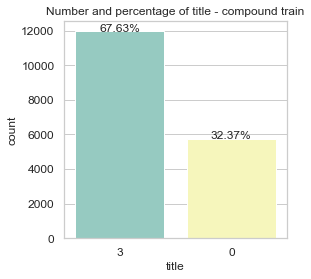

In [164]:
plot_count('title', 'title - compound train', comp_train_df)

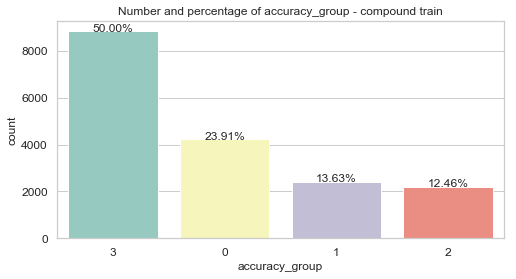

In [165]:
plot_count('accuracy_group', 'accuracy_group - compound train', comp_train_df, size=2)

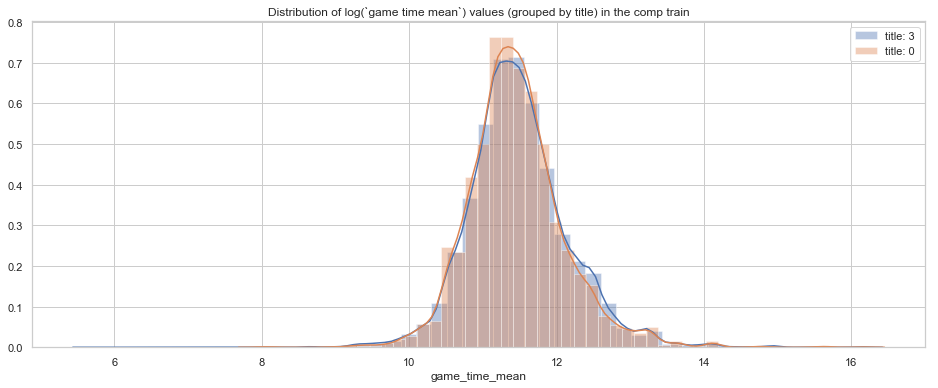

In [166]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

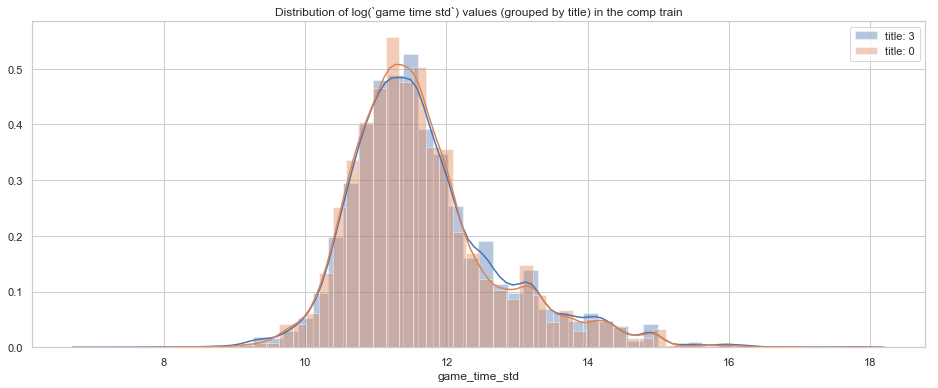

In [168]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of log(`game time std`) values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

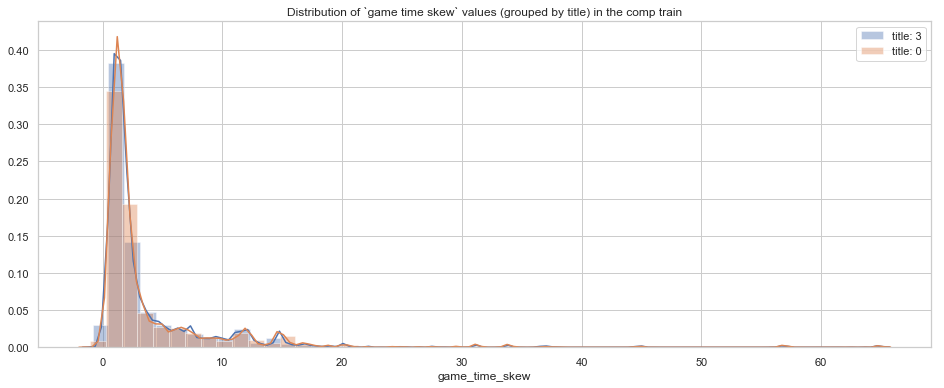

In [170]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `game time skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

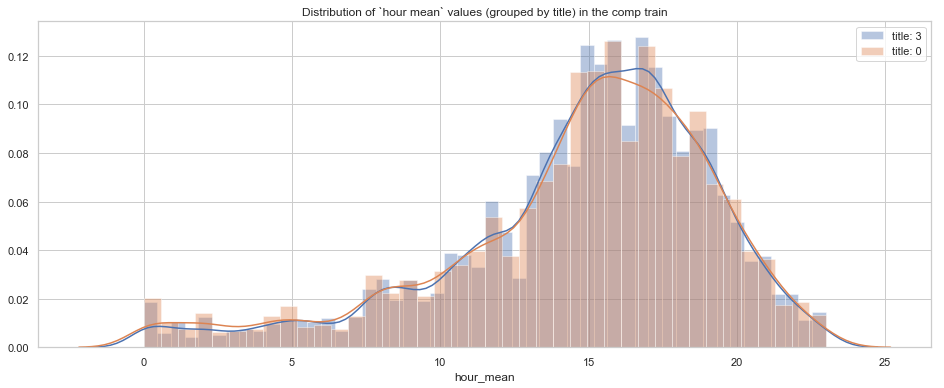

In [171]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

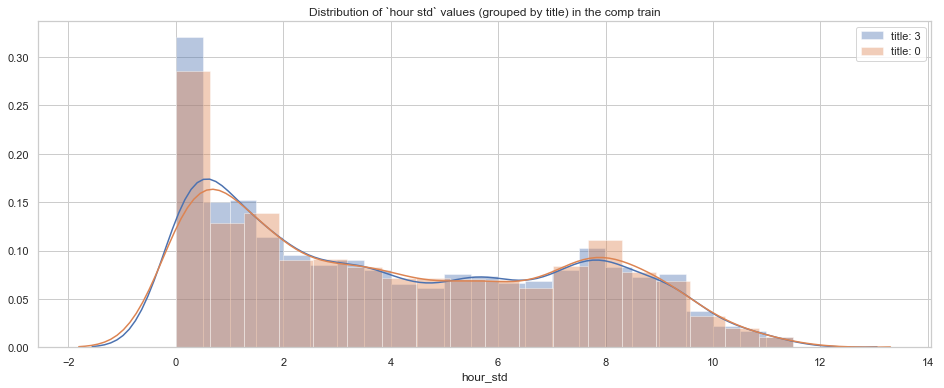

In [172]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

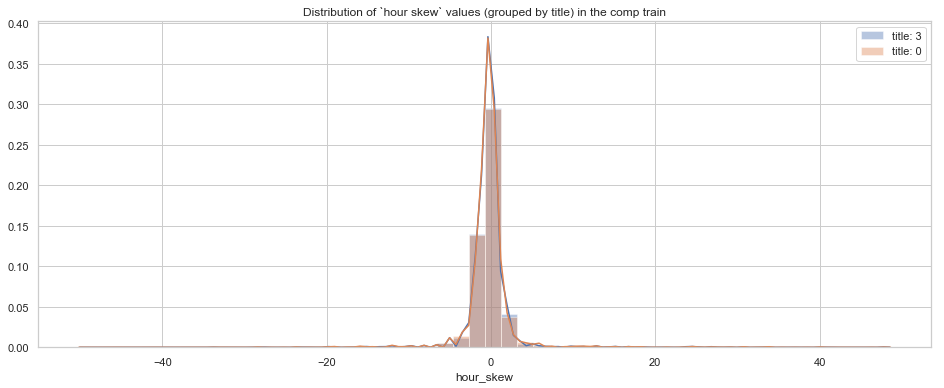

In [173]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `hour skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

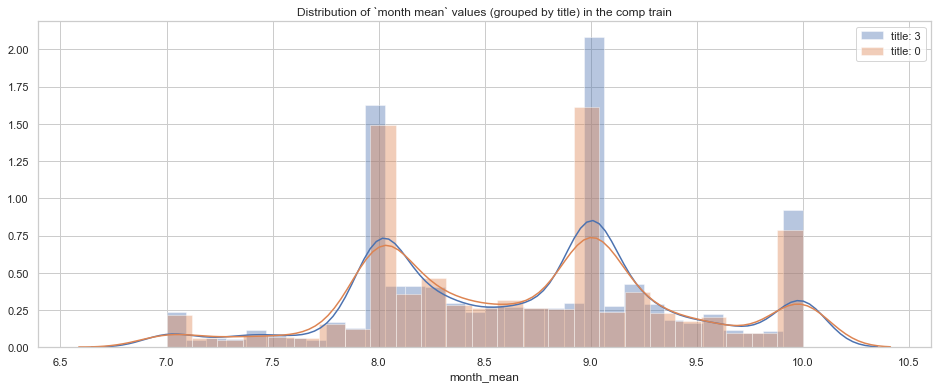

In [174]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month mean` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

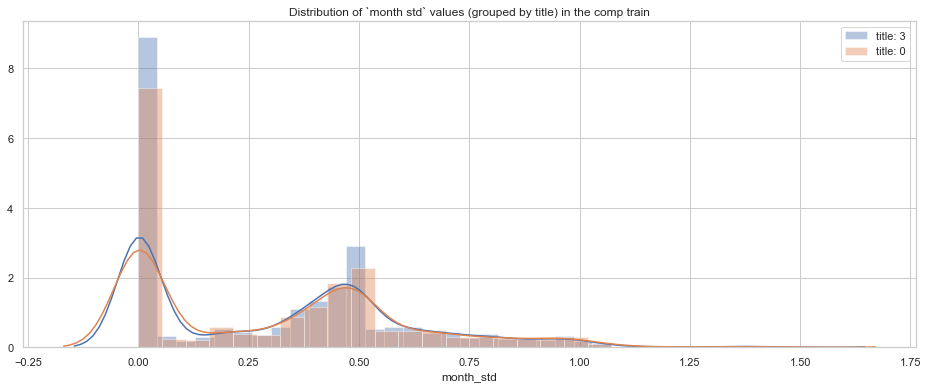

In [175]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month std` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

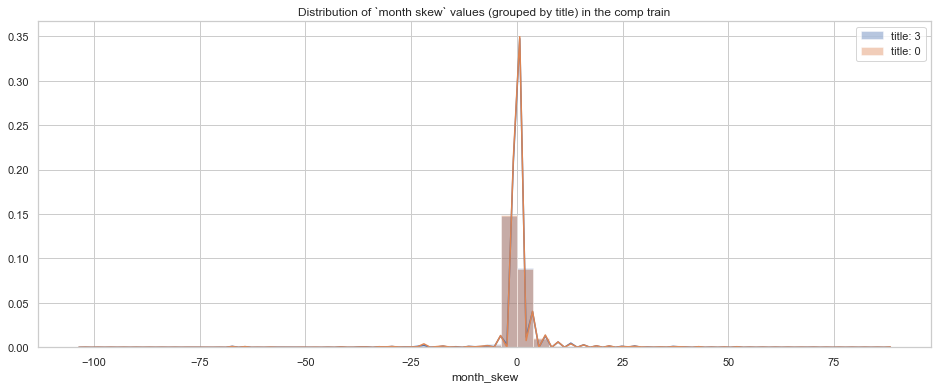

In [176]:
plt.figure(figsize=(16,6))
_titles = comp_train_df.title.unique()
plt.title("Distribution of `month skew` values (grouped by title) in the comp train")
for _title in _titles:
    red_comp_train_df = comp_train_df.loc[comp_train_df.title == _title]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'title: {_title}')
plt.legend()
plt.show()

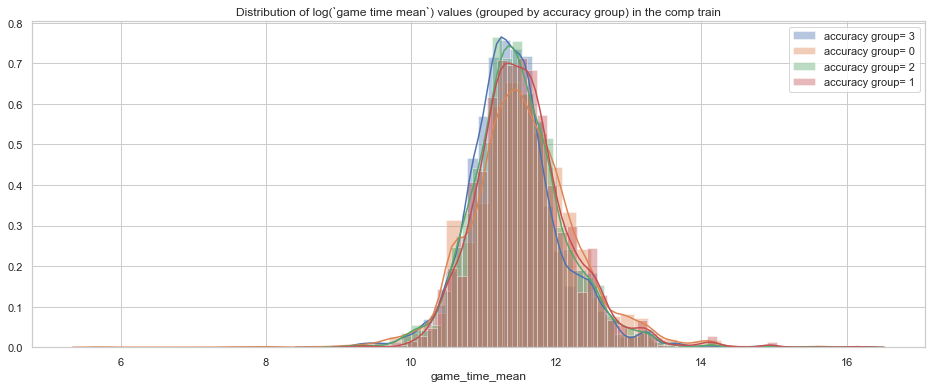

In [177]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time mean`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_mean']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

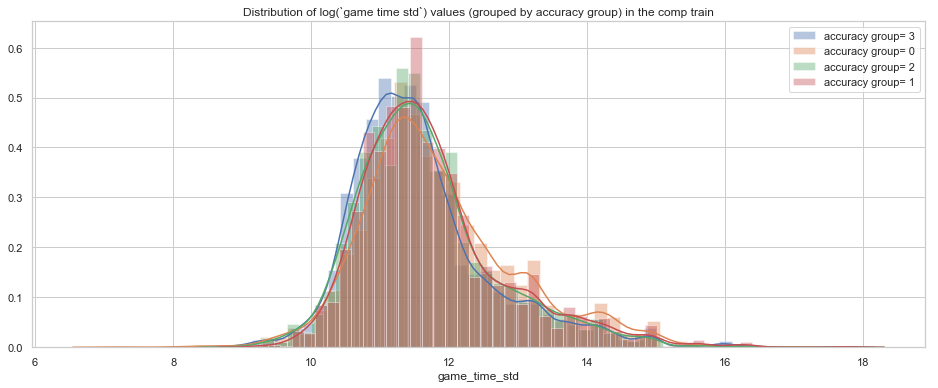

In [178]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of log(`game time std`) values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(np.log(red_comp_train_df['game_time_std']), kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

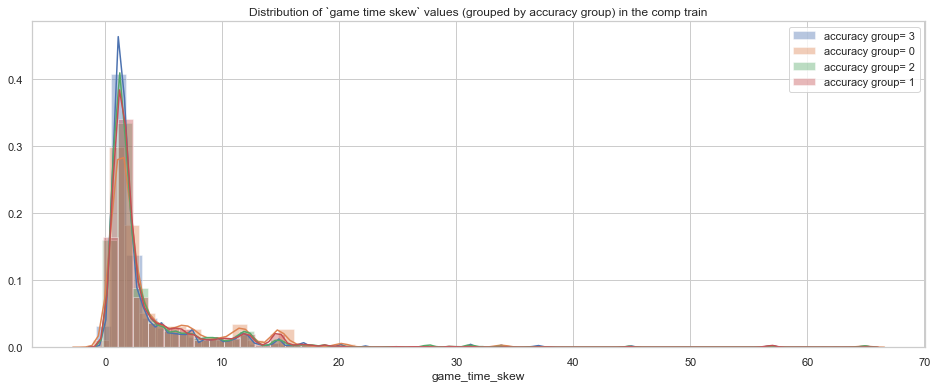

In [179]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `game time skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['game_time_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

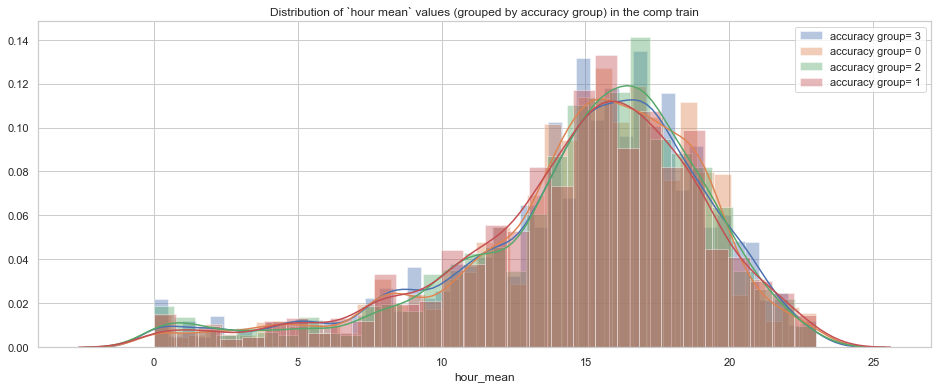

In [180]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

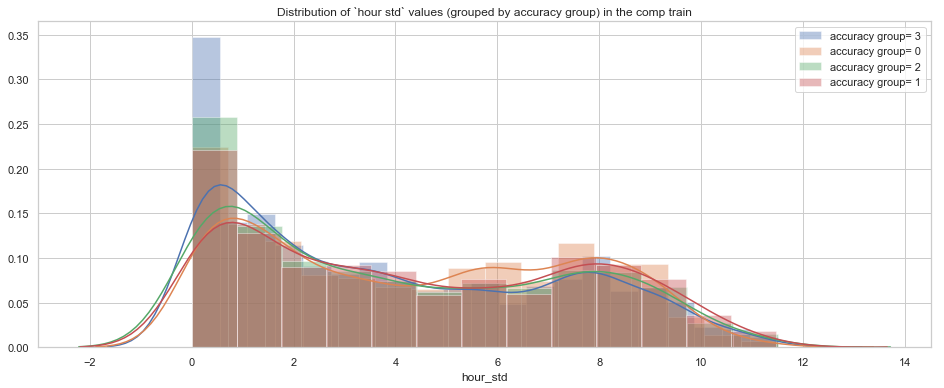

In [181]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

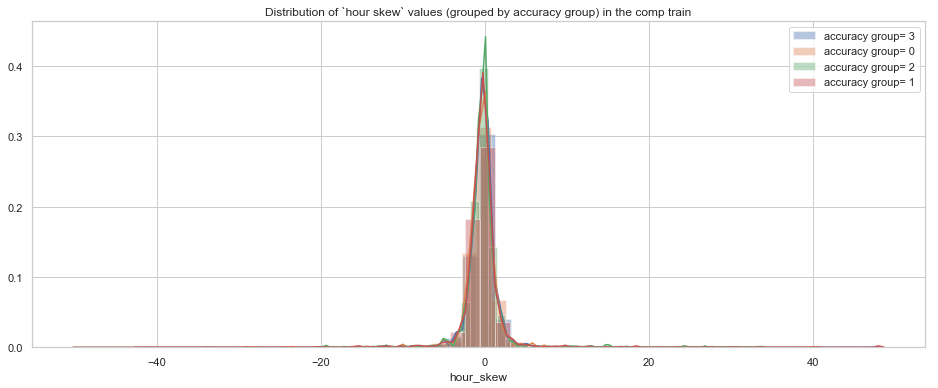

In [182]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `hour skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['hour_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

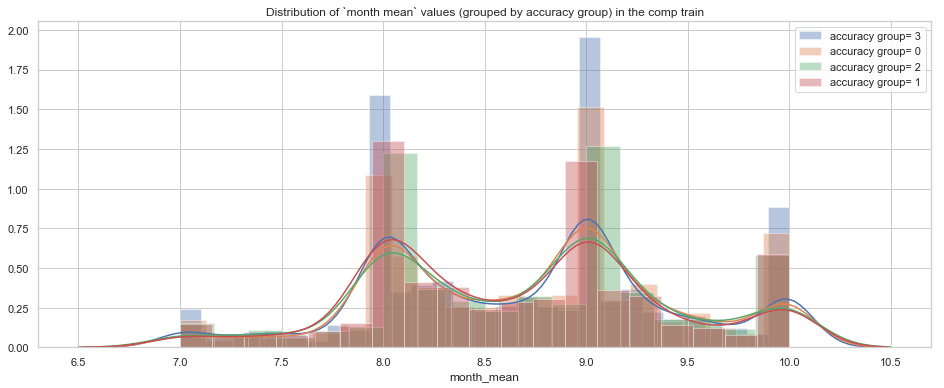

In [183]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month mean` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_mean'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

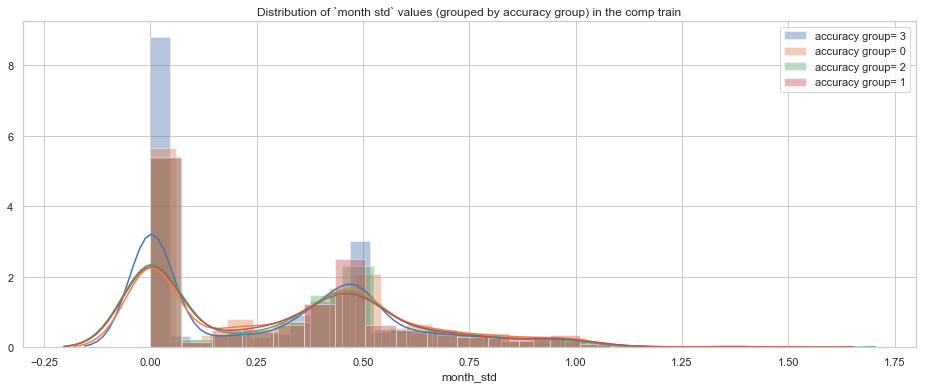

In [184]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month std` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_std'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

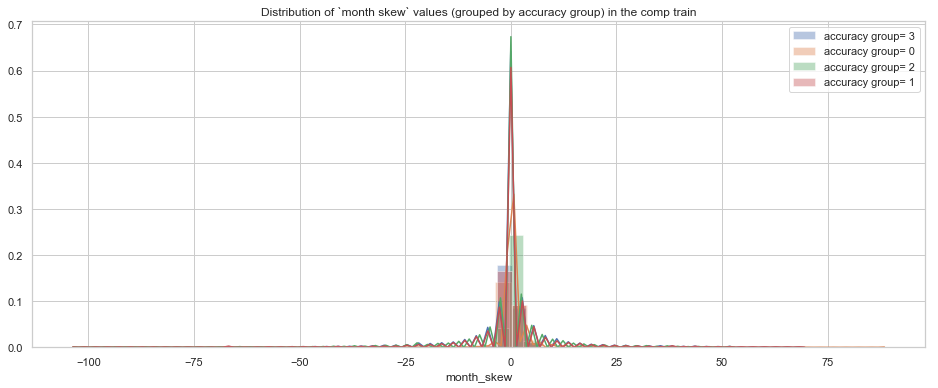

In [185]:
plt.figure(figsize=(16,6))
_accuracy_groups = comp_train_df.accuracy_group.unique()
plt.title("Distribution of `month skew` values (grouped by accuracy group) in the comp train")
for _accuracy_group in _accuracy_groups:
    red_comp_train_df = comp_train_df.loc[comp_train_df.accuracy_group == _accuracy_group]
    sns.distplot(red_comp_train_df['month_skew'], kde=True, label=f'accuracy group= {_accuracy_group}')
plt.legend()
plt.show()

# <a id="4">Next step</a>  

The next step will be to use the ideas from data exploration to start extracting, selecting, engineering features and prepare models.  

